# LOAN CREDIBILITY PREDICTOR

## PROBLEM STATEMENT

Conventional credit scoring methods like credit history, collateral, or any prior accounts might not give every person an equal opportunity to establish credit. As a result, a small number of people can access basic banking services like opening a bank account and acquiring a loan. Using the pre-existing datasets, we can understand the track record of banks and the reason why conventional credit scoring is needed. Come up with an AI based solution to perform credit scoring for people who don’t have any previous loans. This can be done by checking some other billing cycles they’ve been a part of and creating a scoring metrics on the basis of that.

## PROJECT DESCRIPTION

This project is mainly focused on the population which is deprived of the basic banking services which include availing loans without having a credit score. 

We have come up with an AI solution where we are provided with data about historic customer behavior. Hence when we acquire new customers with no previous loan history, it can predict who is riskier and who is not.

We have used a basic Logistic Regression model to find the required solution to the given problem. We imported the dataset from kaggle.com and tried out various correlations, attribute combinations to analyze and understand the data. Once the raw data was completely cleaned and freed of redundancies we used it in the ML algorithm to build the solution - credit scorecard.

## DATASET USED:

To build our project, we decided to use dataset available on kaggle.com

## DATA FEATURES

- ID: Id of the user (all unique)

- Income: Income of the user

- Age: Age of the user

- Experience: Professional experience of the user in years

- Profession: Profession of the user

- Married/Single: Whether married or not

- House Ownership: Owned or rented or neither

- Car Ownership: Does the person own a car

- STATE: State of residence

- CITY: City of residence

- CURRENT_JOB_YRS: Years of experience in the current job

- CURRENT_HOUSE_YRS: Number of years in the current residence

- Risk_Flag: Risk of loan rejection(0 if approved, 1 if rejected)

## INITIATING THE PROJECT

### IMPORTING NECESSARY LIBRARIES

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math


### IMPORTING DATA AND DATA CLEANING

In [2]:
df = pd.read_csv("DATA.csv")

In [3]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


No missing values in the dataset.

In [5]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.drop(["Id"], axis = 1, inplace = True)
df.drop(["Profession"], axis=1, inplace = True)
df.drop(["CITY"], axis=1, inplace = True)
df.drop(["STATE"], axis=1, inplace = True)

These attributes were dropped in our model, as we would be using only numerical values.

In [7]:
df.replace({'Married/Single': {'married': 1, 'single': 0}},inplace=True)
df.replace({'House_Ownership': {'owned': 1, 'rented': 0, "norent_noown":-1}},inplace=True)
df.replace({'Car_Ownership': {'yes': 1, 'no': 0}},inplace=True)

These attributes were replaced by numerical values so that we could use these attributes in our model.

In [8]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,0,0,3,13,0
1,7574516,40,10,0,0,0,9,13,0
2,3991815,66,4,1,0,0,4,10,0
3,6256451,41,2,0,0,1,2,12,1
4,5768871,47,11,0,0,0,3,14,1


### PLOTTING HISTOGRAM

We plotted histograms in order to visualise the data to conceptualise the relations among the various features of the dataset.

In [9]:
%matplotlib inline

array([[<AxesSubplot: title={'center': 'Income'}>]], dtype=object)

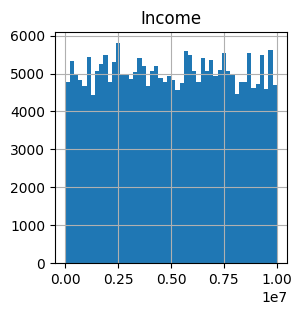

In [10]:

df.hist(column="Income",bins = 50, figsize = (3,3))

array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

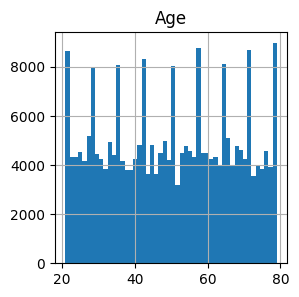

In [11]:
df.hist(column="Age",bins =50 ,figsize = (3,3))

array([[<AxesSubplot: title={'center': 'Experience'}>]], dtype=object)

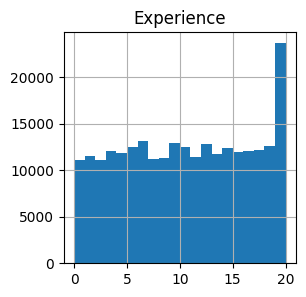

In [12]:
df.hist(column="Experience",bins =20 ,figsize = (3,3))

array([[<AxesSubplot: title={'center': 'Married/Single'}>]], dtype=object)

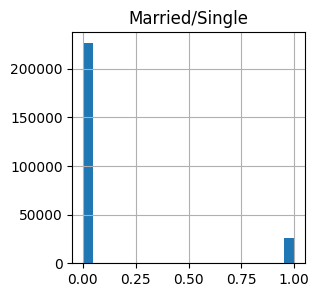

In [13]:
df.hist(column="Married/Single",bins =20 ,figsize = (3,3))

array([[<AxesSubplot: title={'center': 'Car_Ownership'}>]], dtype=object)

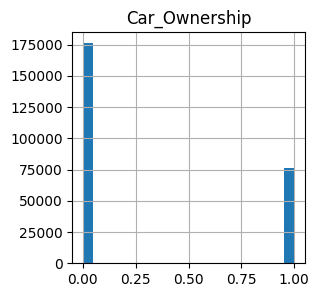

In [14]:
df.hist(column="Car_Ownership",bins =20 ,figsize = (3,3))

array([[<AxesSubplot: title={'center': 'House_Ownership'}>]], dtype=object)

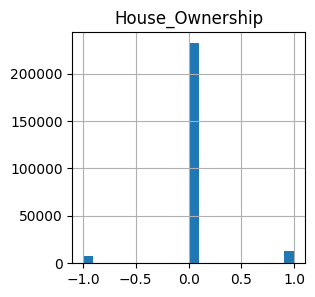

In [33]:
df.hist(column="House_Ownership",bins =20 ,figsize = (3,3))

array([[<AxesSubplot: title={'center': 'CURRENT_JOB_YRS'}>]], dtype=object)

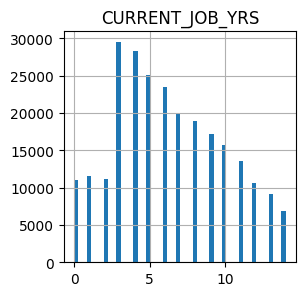

In [16]:
df.hist(column="CURRENT_JOB_YRS",bins =50 ,figsize = (3,3))

array([[<AxesSubplot: title={'center': 'CURRENT_HOUSE_YRS'}>]],
      dtype=object)

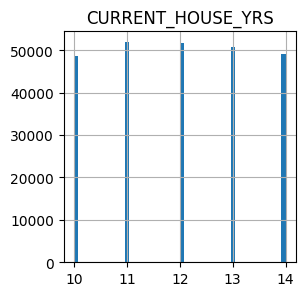

In [17]:
df.hist(column="CURRENT_HOUSE_YRS",bins =50 ,figsize = (3,3))

array([[<AxesSubplot: title={'center': 'Risk_Flag'}>]], dtype=object)

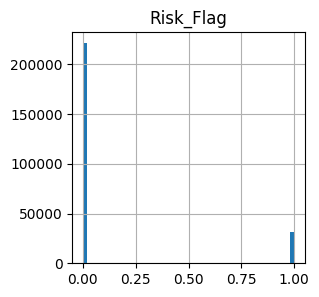

In [18]:
df.hist(column="Risk_Flag",bins =50 ,figsize = (3,3))

### TRAIN- TEST SPLITTING

We separated the features (independent variables) and label (dependent variable) in our dataframe.Then we split our dataframe into train and test data in the ratio 80:20.

In [19]:
X = df.drop(['Risk_Flag'],axis=1)
Y = df.Risk_Flag

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### LOOKING FOR CORRELATIONS

We calculated Pearson Correlation Coefficient with respect to "Risk_Flag"  to analyze which features to use for our logistic regression model.

In [21]:
corr_matrix = df.corr()

In [22]:
corr_matrix["Risk_Flag"].sort_values(ascending = False)

Risk_Flag            1.000000
Income              -0.003091
CURRENT_HOUSE_YRS   -0.004375
House_Ownership     -0.011171
CURRENT_JOB_YRS     -0.016942
Married/Single      -0.021092
Age                 -0.021809
Car_Ownership       -0.024036
Experience          -0.034523
Name: Risk_Flag, dtype: float64

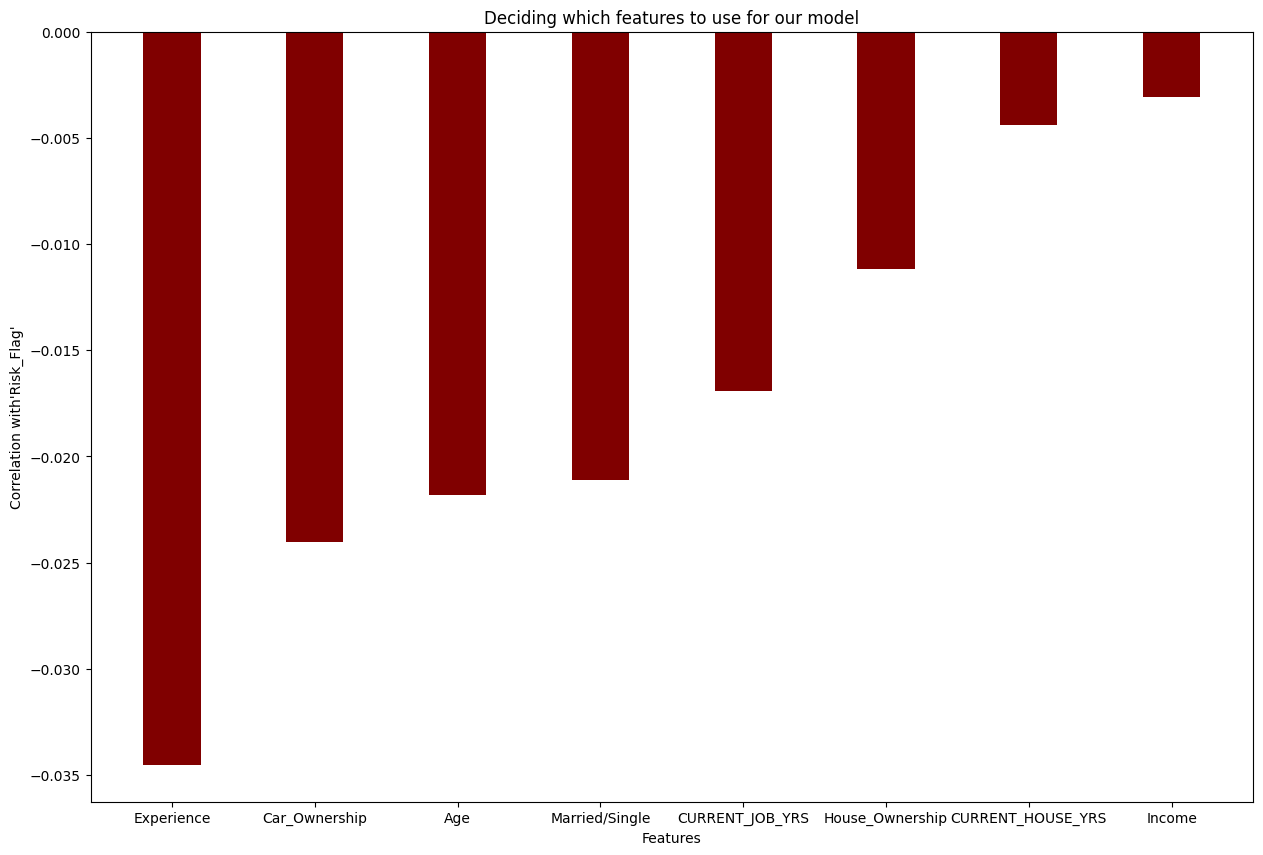

In [23]:
data=dict(corr_matrix["Risk_Flag"].sort_values(ascending = True))
data.pop("Risk_Flag")
features=list(data.keys())
values=list(data.values())
fig = plt.figure(figsize = (15,10))
plt.bar(features, values, color ='maroon',width = 0.4)
plt.xlabel("Features")
plt.ylabel("Correlation with'Risk_Flag'")
plt.title("Deciding which features to use for our model")
plt.show()


Since, "Car_Ownership", "Experience", "Married/Single" and "Age" showed highly negative correlation with respect to "Risk_Flag", we decided to use these features in our regression model.

In [24]:
imp_features = ["Car_Ownership","Experience","Married/Single","Age"]

df_for_pca = df[imp_features]
label_encoder = LabelEncoder()

for col in imp_features:
    df[col] = label_encoder.fit_transform(df[col])


We used label encoding to convert the categorical variables in the list "imp_features" to numerical values so that they can be used as input for our machine learning model.

Then we concatenated the selected features with the original dataframe.

In [25]:
df1 = pd.concat([df,df_for_pca],axis=1)
df1.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Car_Ownership,Experience,Married/Single,Age
0,1303834,2,3,0,0,0,3,13,0,0,3,0,23
1,7574516,19,10,0,0,0,9,13,0,0,10,0,40
2,3991815,45,4,1,0,0,4,10,0,0,4,1,66
3,6256451,20,2,0,0,1,2,12,1,1,2,0,41
4,5768871,26,11,0,0,0,3,14,1,0,11,0,47


## SCORECARD

In order to provide an equal opportunity for everyone to establish credit, we prepared a scorecard which evaluates the features of the dataframe and produces a score which can be used to assess their credibility.

In [ ]:
df["Scorecard"]=0
for i in data:
    df["Scorecard"]+=abs(data[i])*df[i]

In [37]:
corr1_matrix = df.corr()
corr1_matrix["Scorecard"].sort_values(ascending = False)

Scorecard            1.000000
Income               1.000000
House_Ownership      0.012282
CURRENT_JOB_YRS      0.007067
Experience           0.006449
Car_Ownership        0.004070
Age                 -0.000610
CURRENT_HOUSE_YRS   -0.002397
Married/Single      -0.002681
Risk_Flag           -0.003093
Name: Scorecard, dtype: float64

After checking the correlation of "Scorecard" with "Risk_Flag", we came to the conclusion that having a high scorecard value means reduced risk for the loan rejection.

So, the people having no prior credit score can assess their credibility via this score.

## APPLYING THE MODEL

In [29]:
sm = SMOTE(random_state = 42)
X_resample, Y_resample = sm.fit_resample(X_train, Y_train)

As there is a lot of imbalance between the amount of people who are eligible for availing loan and those who are not, therefore we decided to use SMOTE (Synthetic Minority Oversampling Technique) to eradicate this disparity.

After removing all the redundancies, we applied our model on test data to test its accuracy.

In [30]:
model_used = LogisticRegression()
model_used.fit(X_resample, Y_resample)
Y_pred = model_used.predict(X_test)
model_accuracy = model_used.score(X_test, Y_test)
print("The accuracy of the model is:",model_accuracy*100,"%")

The accuracy of the model is: 87.59325396825398 %


## CONCLUSION

The accuracy of our AI model is 87.6% .Thus our model allows us to efficiently predict the risk factor of the client's loan application.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ccfb84f-6e4f-4924-b293-4fcad2ff41b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>